To reduce the mse score i have scaled the data using standard scalar <br>
The model seems to work better after scaling the data. MSE score also reduced drastically.

* RESULT:
On the test datset XGBOOST worked best wheras on CV datset SVM worked best*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


To creat training and testing data I have only used 2 files <br>
For cross validation data I have used the third file as discussed

In [2]:
df_train=pd.read_csv('data_ml.csv')
df_train

,RI,wl,tg,A,da2,CM,core loss
0,1.4,900,40,1.8,1.0,1.4379,9.1
1,1.4,910,40,1.8,1.0,1.4375,11.6
2,1.4,920,40,1.8,1.0,1.4371,15.2
3,1.4,930,40,1.8,1.0,1.4367,20.1
4,1.4,940,40,1.8,1.0,1.4363,27.1
...,...,...,...,...,...,...,...
551,1.4,1040,40,1.9,1.2,1.4330,20.2
552,1.4,1050,40,1.9,1.2,1.4327,18.3
553,1.4,1060,40,1.9,1.2,1.4323,16.3
554,1.4,1070,40,1.9,1.2,1.4320,15.4


In [3]:
df_ex=pd.read_excel('1.40 data ml.xlsx')

In [4]:
df_ex.to_csv('df.csv', encoding='utf-8', index=False)
df_csv=pd.read_csv('df.csv')


In [5]:
df_csv

,RI,wl,tg,A,da2,CM,core loss
0,1.4,900,40,1.8,1,1.437900,9.1
1,1.4,910,40,1.8,1,1.437500,11.6
2,1.4,920,40,1.8,1,1.437100,15.2
3,1.4,930,40,1.8,1,1.436700,20.1
4,1.4,940,40,1.8,1,1.436300,27.1
...,...,...,...,...,...,...,...
76,1.4,930,40,2.0,1,1.440000,8.9
77,1.4,940,40,2.0,1,1.439533,7.9
78,1.4,950,40,2.0,1,1.439083,7.4
79,1.4,960,40,2.0,1,1.438633,6.6


In [6]:
df=pd.concat([df_train,df_csv], axis=0,ignore_index=True)


In [7]:
df

,RI,wl,tg,A,da2,CM,core loss
0,1.4,900,40,1.8,1.0,1.437900,9.1
1,1.4,910,40,1.8,1.0,1.437500,11.6
2,1.4,920,40,1.8,1.0,1.437100,15.2
3,1.4,930,40,1.8,1.0,1.436700,20.1
4,1.4,940,40,1.8,1.0,1.436300,27.1
...,...,...,...,...,...,...,...
632,1.4,930,40,2.0,1.0,1.440000,8.9
633,1.4,940,40,2.0,1.0,1.439533,7.9
634,1.4,950,40,2.0,1.0,1.439083,7.4
635,1.4,960,40,2.0,1.0,1.438633,6.6


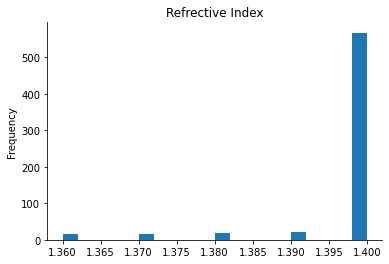

In [8]:
from matplotlib import pyplot as plt
df['RI'].plot(kind='hist', bins=20, title='Refrective Index')
plt.gca().spines[['top', 'right',]].set_visible(False)

<AxesSubplot:title={'center':'Wavelegth'}, ylabel='Frequency'>

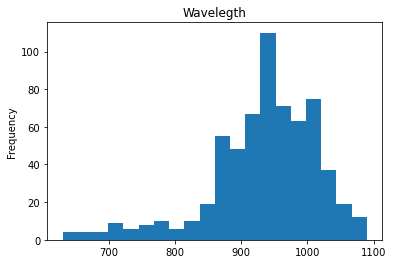

In [9]:
df['wl'].plot(kind='hist', bins=20, title='Wavelegth')

In [10]:
desired_value = '122..5'
result = df[df['core loss'] == desired_value]
result

,RI,wl,tg,A,da2,CM,core loss
599,1.4,950,40,1.9,1.0,1.438,122..5


In [11]:
df['core loss']=np.where(df['core loss'] == '122..5', '122.5', df['core loss'])

In [12]:
df['core loss']=np.where(df['core loss'] == '10..9', '10.9', df['core loss'])

In [13]:
df['core loss']=df['core loss'].astype(np.float64)

In [14]:
df.describe()

,RI,wl,tg,A,da2,CM,core loss
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,1.397410,933.751962,39.908948,1.897645,1.000000,1.438512,46.269042
std,0.008263,82.436681,4.463112,0.036374,0.048564,0.003358,38.562089
min,1.360000,630.000000,30.000000,1.800000,0.800000,1.430800,2.100000
25%,1.400000,900.000000,40.000000,1.900000,1.000000,1.436300,20.200000
50%,1.400000,940.000000,40.000000,1.900000,1.000000,1.438200,34.200000
75%,1.400000,990.000000,40.000000,1.900000,1.000000,1.440100,60.900000
max,1.400000,1090.000000,50.000000,2.000000,1.200000,1.450700,216.200000


In [15]:
dfog=df.copy()

## Scaling dataset

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df.values)
df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)

C:\Users\yarim\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
df.head()

,RI,wl,tg,A,da2,CM,core loss
0,0.313718,-0.409751,0.020417,-2.686593,0.0,-0.182301,-0.964633
1,0.313718,-0.288350,0.020417,-2.686593,0.0,-0.301505,-0.899751
2,0.313718,-0.166950,0.020417,-2.686593,0.0,-0.420709,-0.806322
3,0.313718,-0.045549,0.020417,-2.686593,0.0,-0.539913,-0.679154
4,0.313718,0.075852,0.020417,-2.686593,0.0,-0.659116,-0.497486


In [18]:

from sklearn.model_selection import train_test_split



# Split the dataset into features (X) and target variables (y)
X = df.drop(['CM'],axis=1) # All columns except the last two
y = df.iloc[:,5:6]  # Last two columns

# Split the data into training, testing, and cross-validation sets
# Adjust the test_size and cv_size as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Now we have:
# - X_train: Features for training
# - y_train: Target variables for training
# - X_test: Features for testing
# - y_test: Target variables for testing
# - X_cv: Features for cross-validation
# - y_cv: Target variables for cross-validation




# Decision TREE

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


decision_tree_regressor = DecisionTreeRegressor()

# Train the models
decision_tree_regressor.fit(X_train, y_train)


# Make predictions on the test set
y_pred_1_test_dt = decision_tree_regressor.predict(X_test)


z=decision_tree_regressor.predict(X_train)



# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_DT = mean_squared_error(y_test, y_pred_1_test_dt)


print("Mean Squared Error for Target Variable 1:", mse_1_DT)





Mean Squared Error for Target Variable 1: 0.005842928087814457


C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CM test data')

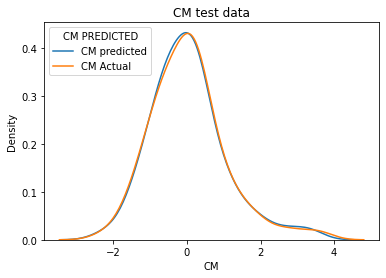

In [20]:
import seaborn as sns
sns.distplot(y_pred_1_test_dt,hist=False)
sns.distplot(y_test,hist=False)
plt.legend(title='CM PREDICTED', loc='upper left', labels=['CM predicted','CM Actual'])
plt.xlabel('CM')
plt.title('CM test data')

In [21]:
y_pred_1_test_dt.shape

(128,)

# CROSS VALIDATION

In [22]:
cv=pd.read_csv('data_ml_2.csv')

In [23]:
cv

,RI,wl,tg,A,da2,CM,core loss
0,1.36,630,40,1.9,1,1.4507,3.2
1,1.36,640,40,1.9,1,1.4503,3.6
2,1.36,650,40,1.9,1,1.4498,4.1
3,1.36,660,40,1.9,1,1.4494,5.7
4,1.36,670,40,1.9,1,1.4489,7.2
...,...,...,...,...,...,...,...
86,1.40,1010,40,1.9,1,1.4358,24.3
87,1.40,1020,40,1.9,1,1.4354,18.7
88,1.40,1030,40,1.9,1,1.4350,16.2
89,1.40,1040,40,1.9,1,1.4346,15.3


## Scaling CV

In [24]:
cvx = cv.drop(['CM'],axis=1) # All columns except the last two
cvy = cv.iloc[:,5:6]  # Last two columns
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

# Fit and transform X_train
scaled_data_cvx = scaler.fit_transform(cvx.values)
cv_x = pd.DataFrame(scaled_data_cvx, index=cv.index, columns=cvx.columns)


scalery = StandardScaler()

# Fit and transform X_train
scaled_y = scalery.fit_transform(cvy.values)
cv_y = pd.DataFrame(scaled_y, index=cvy.index, columns=cvy.columns)

In [25]:
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# scaler = StandardScaler()

# # Fit and transform X_train
# scaled_data_cv = scaler.fit_transform(cv.values)
# cv = pd.DataFrame(scaled_data_cv, index=cv.index, columns=cv.columns)

In [26]:
# cv_x = cv.drop(['CM'],axis=1) # All columns except the last two
# cv_y = cv.iloc[:,5:6]  # Last two columns

In [27]:
cv_x

,RI,wl,tg,A,da2,core loss
0,-1.564361,-1.736049,0.0,-2.220446e-16,0.0,-0.806542
1,-1.564361,-1.641450,0.0,-2.220446e-16,0.0,-0.788554
2,-1.564361,-1.546851,0.0,-2.220446e-16,0.0,-0.766069
3,-1.564361,-1.452252,0.0,-2.220446e-16,0.0,-0.694117
4,-1.564361,-1.357653,0.0,-2.220446e-16,0.0,-0.626662
...,...,...,...,...,...,...
86,1.297083,1.858716,0.0,-2.220446e-16,0.0,0.142322
87,1.297083,1.953315,0.0,-2.220446e-16,0.0,-0.109509
88,1.297083,2.047914,0.0,-2.220446e-16,0.0,-0.221934
89,1.297083,2.142514,0.0,-2.220446e-16,0.0,-0.262406


In [28]:
y_pred_cv_dt = decision_tree_regressor.predict(cv_x)

In [29]:
y_pred_cv_dt

array([ 1.63555971,  1.51635575,  1.3971518 ,  1.3971518 ,  1.27794784,
        1.18854487,  1.06934091,  0.97993794,  0.97993794,  0.92033596,
        0.92033596,  0.62232607,  0.62232607,  0.62232607,  0.29451518,
        1.3971518 ,  1.3971518 ,  1.27794784,  1.18854487,  1.06934091,
        0.97993794,  0.97993794,  0.86073398,  0.74153002,  0.62232607,
        0.62232607,  0.47332112,  0.39385181,  0.27961469,  0.17531122,
        0.17531122,  0.97993794,  0.97993794,  0.92033596,  0.92033596,
        0.62232607,  0.62232607,  0.44352013,  0.39385181,  0.29451518,
        0.14551023,  0.14551023,  0.02630627, -0.03329571, -0.15249966,
       -0.15249966, -0.21210164, -0.36110659, -0.42666877,  0.62232607,
        0.5329231 ,  0.39385181,  0.27961469,  0.14551023,  0.14551023,
        0.02630627, -0.03329571, -0.15249966, -0.15249966, -0.2518363 ,
       -0.36110659, -0.45050956, -0.56971352, -0.56971352, -0.68891748,
       -0.77832045, -0.8975244 , -0.8975244 , -0.98692737, -1.16

C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CM cross validation')

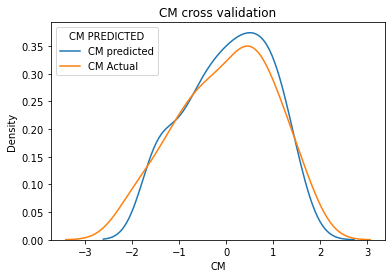

In [30]:
import seaborn as sns
sns.distplot(y_pred_cv_dt,hist=False)
sns.distplot(cv_y,hist=False)
plt.legend(title='CM PREDICTED', loc='upper left', labels=['CM predicted','CM Actual'])
plt.xlabel('CM')
plt.title('CM cross validation')

In [31]:
# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_DT_cv = mean_squared_error(cv_y, y_pred_cv_dt)
print("Mean Squared Error for Target Variable 1:", mse_1_DT_cv)

Mean Squared Error for Target Variable 1: 0.026581253546968185


# KNN REGRESSOR

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create separate KNN regression models for each target variable
knn_regressor_1 = KNeighborsRegressor(n_neighbors=3)  # Adjust the number of neighbors as needed


# Train the models
knn_regressor_1.fit(X_train, y_train)


# Make predictions on the test set
y_pred_1_kt = knn_regressor_1.predict(X_test)


# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_kt = mean_squared_error(y_test, y_pred_1_kt)
print("Mean Squared Error for Target Variable 1:", mse_1_kt)




Mean Squared Error for Target Variable 1: 0.009999317835231988


In [33]:
y_pred_cv_kt = knn_regressor_1.predict(cv_x)
# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_kt_cv = mean_squared_error(cv_y, y_pred_cv_kt)
print("Mean Squared Error for Target Variable 1:", mse_1_kt_cv)

Mean Squared Error for Target Variable 1: 0.21421880941413646


C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CM test data: KNN')

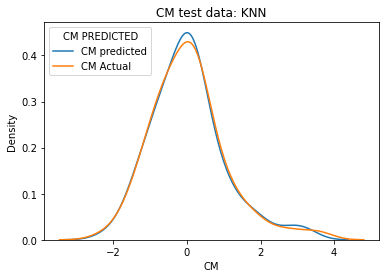

In [34]:
import seaborn as sns
sns.distplot(y_pred_1_kt,hist=False)
sns.distplot(y_test,hist=False)
plt.legend(title='CM PREDICTED', loc='upper left', labels=['CM predicted','CM Actual'])
plt.xlabel('CM')
plt.title('CM test data: KNN')

C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CM cross validation: KNN')

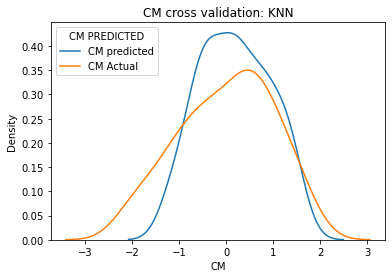

In [35]:
import seaborn as sns
sns.distplot(y_pred_cv_kt,hist=False)
sns.distplot(cv_y,hist=False)
plt.legend(title='CM PREDICTED', loc='upper left', labels=['CM predicted','CM Actual'])
plt.xlabel('CM')
plt.title('CM cross validation: KNN')

# SVR REGRESSION

In [36]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create separate SVM regression models for each target variable
svm_regressor_1 = SVR(kernel='linear')  # Adjust the kernel and other parameters as needed


# Train the models
svm_regressor_1.fit(X_train, y_train)


# Make predictions on the test set
y_pred_1_st = svm_regressor_1.predict(X_test)


# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_SVR_t = mean_squared_error(y_test, y_pred_1_st)

print("Mean Squared Error for CM (TEST):", mse_1_SVR_t)

#CV

y_pred_cv_sv = svm_regressor_1.predict(cv_x)
# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_sv_cv = mean_squared_error(cv_y, y_pred_cv_sv)
print("Mean Squared Error for CM (CV):", mse_1_sv_cv)

Mean Squared Error for CM (TEST): 0.004446632955225719
Mean Squared Error for CM (CV): 0.006741713943040348


C:\Users\yarim\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CM test data: SVM')

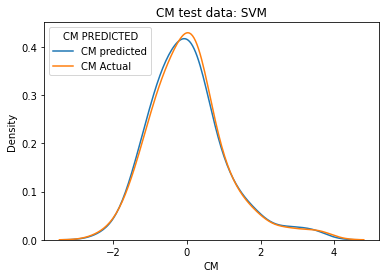

In [37]:
import seaborn as sns
sns.distplot(y_pred_1_st,hist=False)
sns.distplot(y_test,hist=False)
plt.legend(title='CM PREDICTED', loc='upper left', labels=['CM predicted','CM Actual'])
plt.xlabel('CM')
plt.title('CM test data: SVM')



C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CM cross validation: SVM')

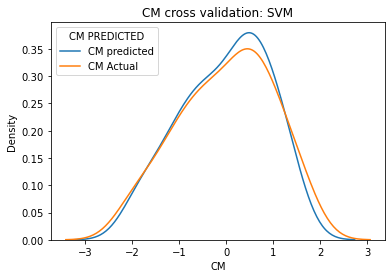

In [38]:
# CV GRAPH

sns.distplot(y_pred_cv_sv,hist=False)
sns.distplot(cv_y,hist=False)
plt.legend(title='CM PREDICTED', loc='upper left', labels=['CM predicted','CM Actual'])
plt.xlabel('CM')
plt.title('CM cross validation: SVM')

# XGBOOST

In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create separate XGBoost regression models for each target variable
xgb_regressor_1 = xgb.XGBRegressor()  # You can adjust hyperparameters as needed


# Train the models
xgb_regressor_1.fit(X_train, y_train)


# Make predictions on the test set
y_pred_1_xg_t = xgb_regressor_1.predict(X_test)


# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_xg_t = mean_squared_error(y_test, y_pred_1_xg_t)


print("Mean Squared Error for Target Variable 1:", mse_1_xg_t)

y_pred_cv_xg = xgb_regressor_1.predict(cv_x)
# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_xg_cv = mean_squared_error(cv_y, y_pred_cv_xg)
print("Mean Squared Error for CM (CV):", mse_1_xg_cv)

Mean Squared Error for Target Variable 1: 0.0021622280908830498
Mean Squared Error for CM (CV): 0.03948287423599917


C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CM test data: XG BOOST')

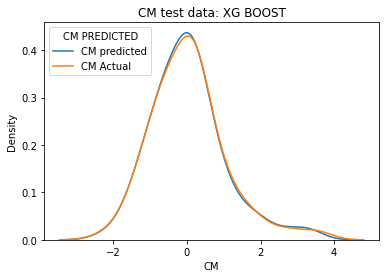

In [40]:
import seaborn as sns
sns.distplot(y_pred_1_xg_t,hist=False)
sns.distplot(y_test,hist=False)
plt.legend(title='CM PREDICTED', loc='upper left', labels=['CM predicted','CM Actual'])
plt.xlabel('CM')
plt.title('CM test data: XG BOOST')



C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CM cross validation: XG BOOST')

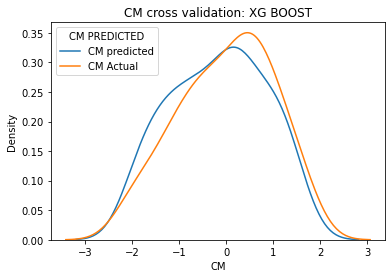

In [41]:
# CV GRAPH

sns.distplot(y_pred_cv_xg,hist=False)
sns.distplot(cv_y,hist=False)
plt.legend(title='CM PREDICTED', loc='upper left', labels=['CM predicted','CM Actual'])
plt.xlabel('CM')
plt.title('CM cross validation: XG BOOST')

# CV and Test data graph for all algorithms

## CV GRAPH

C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0.5, 1.0, 'CM cross validation')

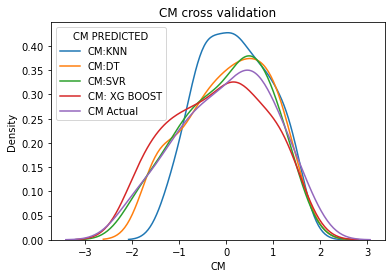

In [42]:
import seaborn as sns
sns.distplot(y_pred_cv_kt,hist=False)
sns.distplot(y_pred_cv_dt,hist=False)
sns.distplot(y_pred_cv_sv,hist=False)
sns.distplot(y_pred_cv_xg,hist=False)
sns.distplot(cv_y,hist=False)
plt.legend(title='CM PREDICTED', loc='upper left', labels=['CM:KNN','CM:DT','CM:SVR','CM: XG BOOST' ,'CM Actual'])
plt.xlabel('CM')
plt.title('CM cross validation')

##TEST GRAPH

C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0.5, 1.0, 'CM test data')

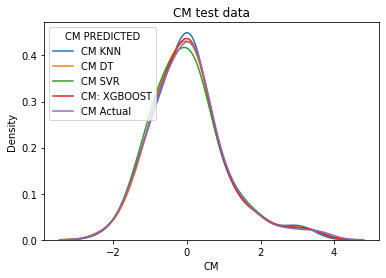

In [43]:
import seaborn as sns
sns.distplot(y_pred_1_kt,hist=False)
sns.distplot(y_pred_1_test_dt,hist=False)
sns.distplot(y_pred_1_st,hist=False)
sns.distplot(y_pred_1_xg_t,hist=False)
sns.distplot(y_test,hist=False)
plt.legend(title='CM PREDICTED', loc='upper left', labels=['CM KNN','CM DT','CM SVR','CM: XGBOOST','CM Actual'])
plt.xlabel('CM')
plt.title('CM test data')



#MSE SCORE FOR ALL THE ALGORITHMS

In [44]:
print('MSE SCORE FOR CM ON TEST DATA\n')
print('DT: ',mse_1_DT)
print('KNN: ',mse_1_kt)
print('XG BOOST:',mse_1_xg_t)
print('SVR: ',mse_1_SVR_t)

print('\nMSE SCORE FOR CM ON CROSS VALIDATION DATA\n')
print('DT: ',mse_1_DT_cv)
print('KNN: ',mse_1_kt_cv)
print('XG BOOST: ',mse_1_xg_cv)
print('SVR: ',mse_1_sv_cv)

print('\n MINIMUM MSE SCORE \n')
print('For testing data')
print('XG BOOST:',mse_1_xg_t)
print('\nFOR CV DATA')
print('SVR: ',mse_1_sv_cv)

MSE SCORE FOR CM ON TEST DATA

DT:  0.005842928087814457
KNN:  0.009999317835231988
XG BOOST: 0.0021622280908830498
SVR:  0.004446632955225719

MSE SCORE FOR CM ON CROSS VALIDATION DATA

DT:  0.026581253546968185
KNN:  0.21421880941413646
XG BOOST:  0.03948287423599917
SVR:  0.006741713943040348

 MINIMUM MSE SCORE 

For testing data
XG BOOST: 0.0021622280908830498

FOR CV DATA
SVR:  0.006741713943040348


In [45]:
df['RI'].describe()

count    6.370000e+02
mean    -5.031297e-14
std      1.000786e+00
min     -4.530844e+00
25%      3.137177e-01
50%      3.137177e-01
75%      3.137177e-01
max      3.137177e-01
Name: RI, dtype: float64

a. For xg-boos and KNN, k-fold cross validation,plot the core mode vs wavelength for actual and predicted values for refractive index range 1.36 to 1.40.<br>
b. For xg-boost and KNN k-fold cross validation,plot the core loss vs wavelength for actual and predicted values for refractive index range 1.36 to 1.40.<br>
3. Compare the actual and predicted values with scattered plots for both the algorithms.

# XGBOOST WL VS CM

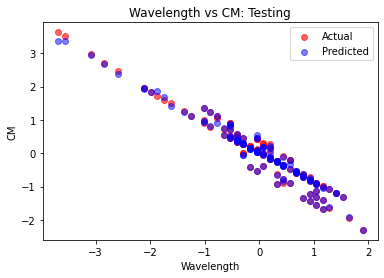

In [46]:
plt.scatter(X_test['wl'] ,y_test, alpha=0.6, color='red')
plt.scatter(X_test['wl'] ,y_pred_1_xg_t, alpha=0.5, color='blue')
plt.xlabel('Wavelength')
plt.ylabel('CM')
plt.legend(loc='upper right',labels=['Actual','Predicted'])
plt.title('Wavelength vs CM: Testing')
plt.savefig('cmRegXG')

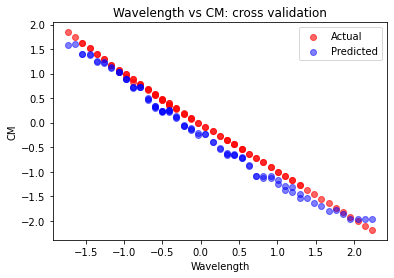

In [47]:
plt.scatter(cv_x['wl'] ,cv_y, alpha=0.6, color='red')
plt.scatter(cv_x['wl'] ,y_pred_cv_xg, alpha=0.5, color='blue')
plt.xlabel('Wavelength')
plt.ylabel('CM')
plt.legend(loc='upper right',labels=['Actual','Predicted'])
plt.title('Wavelength vs CM: cross validation')
plt.savefig('cmRegXGcv')

# KNN CM VS WL

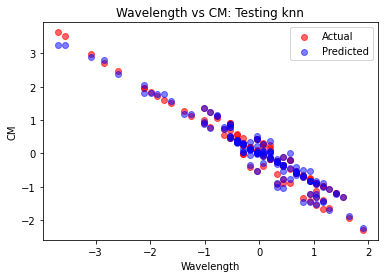

In [48]:
plt.scatter(X_test['wl'] ,y_test, alpha=0.6, color='red')
plt.scatter(X_test['wl'] ,y_pred_1_kt, alpha=0.5, color='blue')
plt.xlabel('Wavelength')
plt.ylabel('CM')
plt.legend(loc='upper right',labels=['Actual','Predicted'])
plt.title('Wavelength vs CM: Testing knn')
plt.savefig('cmRegknn')

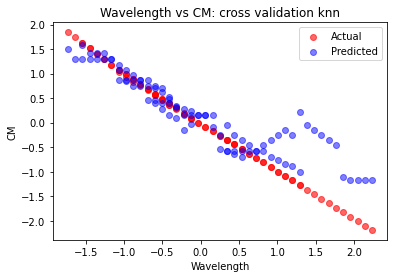

In [49]:
plt.scatter(cv_x['wl'] ,cv_y, alpha=0.6, color='red')
plt.scatter(cv_x['wl'] ,y_pred_cv_kt, alpha=0.5, color='blue')
plt.xlabel('Wavelength')
plt.ylabel('CM')
plt.legend(loc='upper right',labels=['Actual','Predicted'])
plt.title('Wavelength vs CM: cross validation knn')
plt.savefig('cmRegknncv')

In [50]:
# arr.shape

# DESCALED VALUES for CROSS VALIDATION 

In [51]:
d=y_pred_cv_dt.reshape(-1,1)
dCV = scalery.inverse_transform(d)
dCV=dCV.flatten()

In [52]:
k=y_pred_cv_kt.reshape(-1,1)
kCV = scalery.inverse_transform(k)
kCV=kCV.flatten()

In [53]:
s=y_pred_cv_sv.reshape(-1,1)
sCV = scalery.inverse_transform(s)
sCV=sCV.flatten()

In [54]:
x=y_pred_cv_xg.reshape(-1,1)
xCV = scalery.inverse_transform(x)
xCV=xCV.flatten()

# DESCALED VALUES FOR TESTING

In [55]:
dt=y_pred_1_test_dt.reshape(-1,1)
dtr = scalery.inverse_transform(dt)
dtr=dtr.flatten()

In [56]:
kt=y_pred_1_kt.reshape(-1,1)
knt = scalery.inverse_transform(kt)
knt=knt.flatten()

In [57]:
st=y_pred_1_st.reshape(-1,1)
svrt = scalery.inverse_transform(st)
svrt=svrt.flatten()

In [58]:
xg=y_pred_1_xg_t.reshape(-1,1)
xgt = scalery.inverse_transform(xg)
xgt=xgt.flatten()

# Actual VS Predicted

In [59]:
y_test_oned=y_test.to_numpy()
arr=y_test_oned.flatten()
d = {'pred': y_pred_1_kt.flatten(), 'actual': arr}
cat = pd.DataFrame(data=d)

In [60]:
y_testog=scalery.inverse_transform(y_test)

In [61]:
df

,RI,wl,tg,A,da2,CM,core loss
0,0.313718,-0.409751,0.020417,-2.686593,0.0,-0.182301,-0.964633
1,0.313718,-0.288350,0.020417,-2.686593,0.0,-0.301505,-0.899751
2,0.313718,-0.166950,0.020417,-2.686593,0.0,-0.420709,-0.806322
3,0.313718,-0.045549,0.020417,-2.686593,0.0,-0.539913,-0.679154
4,0.313718,0.075852,0.020417,-2.686593,0.0,-0.659116,-0.497486
...,...,...,...,...,...,...,...
632,0.313718,-0.045549,0.020417,2.816172,0.0,0.443520,-0.969823
633,0.313718,0.075852,0.020417,2.816172,0.0,0.304449,-0.995776
634,0.313718,0.197252,0.020417,2.816172,0.0,0.170344,-1.008752
635,0.313718,0.318653,0.020417,2.816172,0.0,0.036240,-1.029514


In [62]:
c=y_testog.flatten()
c.shape

(128,)

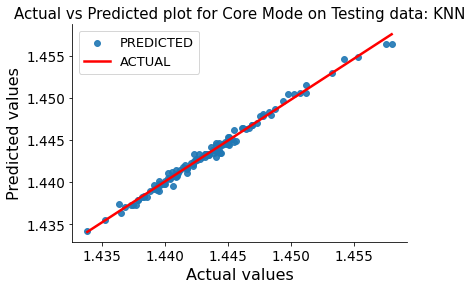

In [65]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(c, knt, s=35, alpha=0.9)

# Add a regression line
plt.plot(np.unique(c), np.poly1d(np.polyfit(c, knt, 1))(np.unique(c)), color='red',linewidth=2.5)

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values',fontsize=16)
plt.ylabel('Predicted values',fontsize=16)
plt.legend(loc='upper left',labels=['PREDICTED','ACTUAL'],fontsize=13)
plt.xticks(fontsize=13.5)
plt.yticks(fontsize=13.5)
plt.title('Actual vs Predicted plot for Core Mode on Testing data: KNN',fontsize=15)
plt.savefig('KNN_CM_TEST.jpg',dpi=600, bbox_inches = 'tight')


In [64]:
dt=cv_y.to_numpy()
y_cv=dt.flatten()

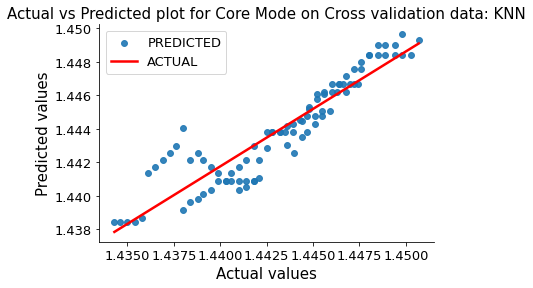

In [65]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(cv['CM'], kCV, s=35, alpha=0.9)

# Add a regression line
plt.plot(np.unique(cv['CM']), np.poly1d(np.polyfit(cv['CM'], kCV, 1))(np.unique(cv['CM'])), color='red',linewidth=2.5)

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values',fontsize=15)
plt.ylabel('Predicted values',fontsize=15)
plt.legend(loc='upper left',labels=['PREDICTED','ACTUAL'],fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Actual vs Predicted plot for Core Mode on Cross validation data: KNN',fontsize=15)
plt.savefig('KNN_CM_CV')


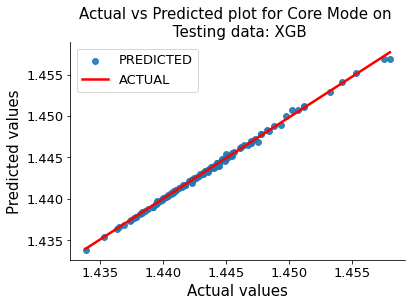

In [66]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(c,xgt, s=35, alpha=0.9)

# Add a regression line
plt.plot(np.unique(c), np.poly1d(np.polyfit(c, xgt, 1))(np.unique(c)), color='red',linewidth=2.5)

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values',fontsize=15)
plt.ylabel('Predicted values',fontsize=15)
plt.legend(loc='upper left',labels=['PREDICTED','ACTUAL'],fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Actual vs Predicted plot for Core Mode on \n Testing data: XGB',fontsize=15)
plt.savefig('XGB_CM_TEST_1.jpg',dpi=600, bbox_inches = 'tight')

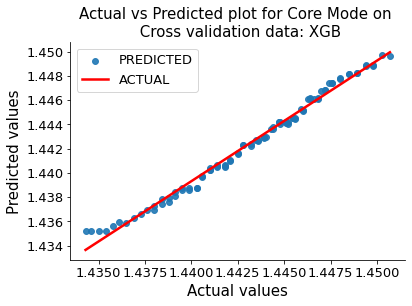

In [67]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(cv['CM'], xCV, s=35, alpha=0.9)

# Add a regression line
plt.plot(np.unique(cv['CM']), np.poly1d(np.polyfit(cv['CM'], xCV, 1))(np.unique(cv['CM'])), color='red',linewidth=2.5)

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values',fontsize=15)
plt.ylabel('Predicted values',fontsize=15)
plt.legend(loc='upper left',labels=['PREDICTED','ACTUAL'],fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Actual vs Predicted plot for Core Mode on \n Cross validation data: XGB',fontsize=15)
plt.savefig('XGB_CM_CV_1.jpg',dpi=600, bbox_inches = 'tight')


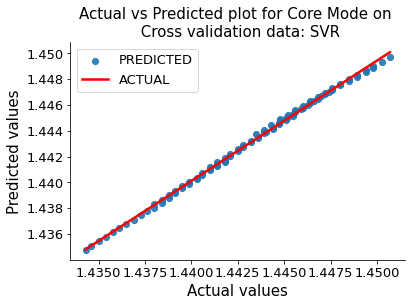

In [68]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(cv['CM'], sCV, s=37, alpha=0.9)

# Add a regression line
plt.plot(np.unique(cv['CM']), np.poly1d(np.polyfit(cv['CM'], sCV, 1))(np.unique(cv['CM'])), color='red',linewidth=2.5)

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values',fontsize=15)
plt.ylabel('Predicted values',fontsize=15)
plt.legend(loc='upper left',labels=['PREDICTED','ACTUAL'],fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Actual vs Predicted plot for Core Mode on \n Cross validation data: SVR',fontsize=15)
plt.savefig('SVR_CM_CV_2.jpg',dpi=600, bbox_inches = 'tight')



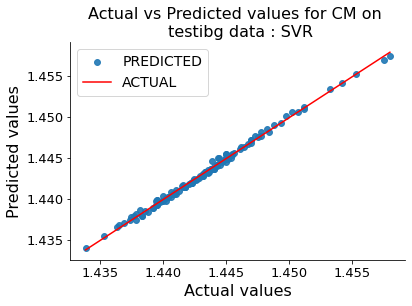

In [69]:

from matplotlib import pyplot as plt
import numpy as np

plt.figsize=(19, 10)
# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(c, svrt, s=35, alpha=0.9)

# Add a regression line
plt.plot(np.unique(c), np.poly1d(np.polyfit(c, svrt, 1))(np.unique(c)), color='red',linewidth=1.5)

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot

plt.xlabel('Actual values',fontsize=16)
plt.ylabel('Predicted values',fontsize=16)
plt.title('Actual vs Predicted values for CM on \n testibg data : SVR',fontsize=16)
plt.legend(loc='upper left',labels=['PREDICTED','ACTUAL'],fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('SVR_CM_test_2.jpg',dpi=600, bbox_inches = 'tight')


In [70]:
# Descale the cv DataFrame
original_data_cv = scaler.inverse_transform(cv_x.values)
descaled_cv = pd.DataFrame(original_data_cv, index=cv_x.index, columns=cv_x.columns)


In [71]:
x=cv['RI']

In [72]:
ri36=cv[x<1.37]

In [73]:
cv['RI'].unique()

array([1.36, 1.37, 1.38, 1.39, 1.4 ])

# XGBOOST CM VS WL for diff RI
## Cross val data 

In [74]:
# Descale the cv DataFrame
y=y_pred_cv_xg.reshape(-1,1)
original_data_cv_pred = scalery.inverse_transform(y)
descaled_cv_pred = pd.DataFrame(original_data_cv_pred, index=cv_y.index, columns=cv_y.columns)

In [75]:
cv['RI'].unique()

array([1.36, 1.37, 1.38, 1.39, 1.4 ])

In [76]:
ri37=cv[x==1.37]

In [77]:
ri37.shape

(16, 7)

In [78]:
ri38=cv[x==1.38]
ri38.shape

(18, 7)

In [79]:
ri39=cv[x==1.39]
ri39.shape

(21, 7)

In [80]:
ri40=cv[x==1.40]
ri40.shape

(21, 7)

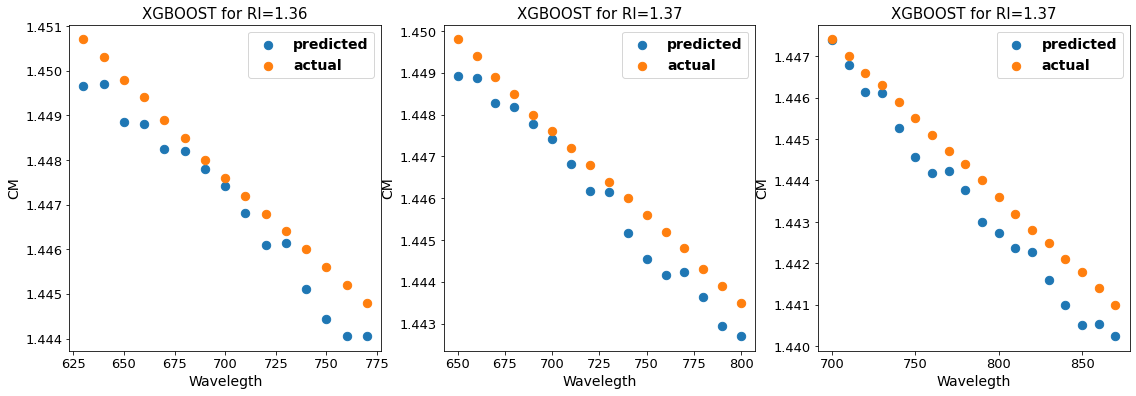

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(19, 6))
legend_properties = {'weight':'bold','size': 14}

ax = axes[0]
ax.scatter(ri36['wl'], original_data_cv_pred[:15],s=70)
ax.scatter(ri36['wl'], ri36['CM'],s=70)
ax.set_xlabel('Wavelegth',fontsize=14)
ax.set_ylabel('CM',fontsize=14)
ax.set_title('XGBOOST for RI=1.36',fontsize=15)
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties,fontsize=14)
ax.tick_params(axis='both',labelsize=13)

ax = axes[1]
ax.scatter(ri37['wl'], original_data_cv_pred[15:31],s=70)
ax.scatter(ri37['wl'], ri37['CM'],s=70)
ax.set_xlabel('Wavelegth',fontsize=14)
ax.set_ylabel('CM',fontsize=14)
ax.set_title('XGBOOST for RI=1.37',fontsize=15)
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties,fontsize=14)
ax.tick_params(axis='both',labelsize=13)

ax = axes[2]
ax.scatter(ri38['wl'], original_data_cv_pred[31:49],s=70)
ax.scatter(ri38['wl'], ri38['CM'],s=70)
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties,fontsize=14)
ax.set_xlabel('Wavelegth',fontsize=14)
ax.set_ylabel('CM',fontsize=14)
ax.set_title('XGBOOST for RI=1.37',fontsize=15)
ax.tick_params(axis='both',labelsize=13)
plt.savefig('XG_WL_13.jpg',dpi=1300, bbox_inches = 'tight')





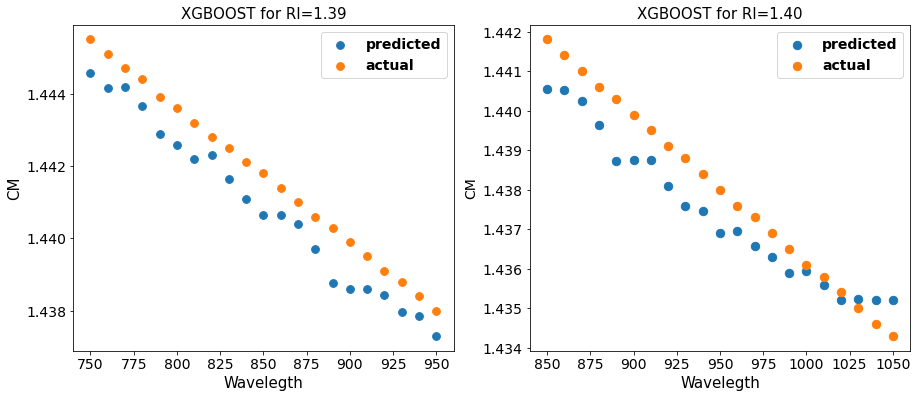

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
legend_properties = {'weight':'bold','size': 14}

ax = axes[0]
ax.scatter(ri39['wl'], original_data_cv_pred[49:70],s=60)
ax.scatter(ri39['wl'], ri39['CM'],s=60)
ax.set_xlabel('Wavelegth',fontsize=15)
ax.set_ylabel('CM',fontsize=15)
ax.set_title('XGBOOST for RI=1.39',fontsize=15)
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)
ax.tick_params(axis='both',labelsize=14)

ax = axes[1]
ax.scatter(ri40['wl'], original_data_cv_pred[70:111],s=70)
ax.scatter(ri40['wl'], ri40['CM'],s=70)
ax.set_xlabel('Wavelegth',fontsize=15)
ax.set_ylabel('CM',fontsize=14)
ax.set_title('XGBOOST for RI=1.40',fontsize=15)
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)
ax.tick_params(axis='both',labelsize=14)
plt.savefig('XG_WL_123.jpg',dpi=1300, bbox_inches = 'tight')


# SVR CM vs WL

In [84]:
# Descale the cv DataFrame
y=y_pred_cv_sv.reshape(-1,1)
cv_pred_sv = scalery.inverse_transform(y)


In [85]:
cv_pred_sv=cv_pred_sv.flatten()

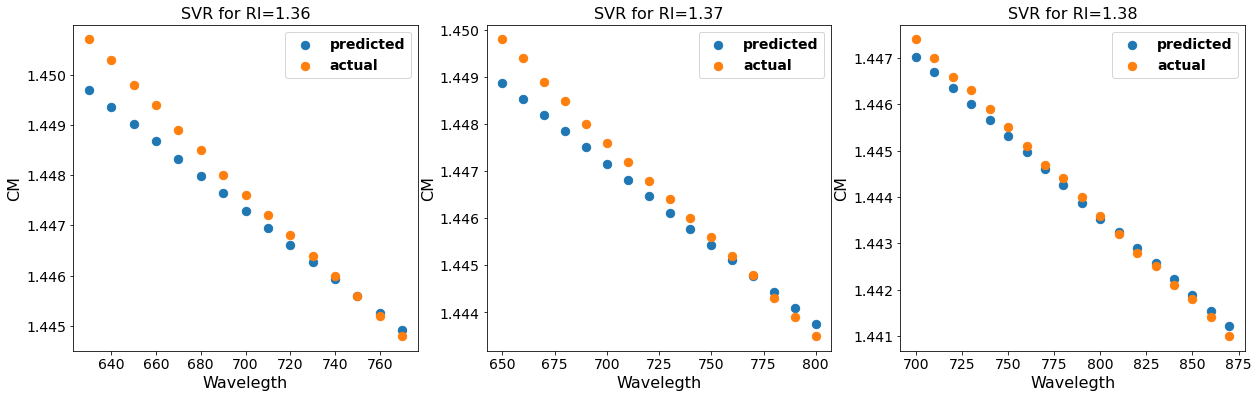

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

legend_properties = {'weight':'bold','size': 14}

ax = axes[0]
ax.scatter(ri36['wl'], cv_pred_sv[:15], s=70)
ax.scatter(ri36['wl'], ri36['CM'],s=70)
ax.set_xlabel('Wavelegth',fontsize=16)
ax.set_ylabel('CM',fontsize=16)
ax.set_title('SVR for RI=1.36',fontsize=16)
ax.legend(loc='upper right',labels=['predicted','actual'], prop=legend_properties)

ax.tick_params(axis='both', labelsize=14)

ax = axes[1]
ax.scatter(ri37['wl'], cv_pred_sv[15:31],s=70)
ax.scatter(ri37['wl'], ri37['CM'],s=70)
ax.set_xlabel('Wavelegth',fontsize=16)
ax.set_ylabel('CM',fontsize=16)
ax.set_title('SVR for RI=1.37',fontsize=16)
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)

ax.tick_params(axis='both', labelsize=14)

ax = axes[2]
ax.scatter(ri38['wl'], cv_pred_sv[31:49],s=70)
ax.scatter(ri38['wl'], ri38['CM'],s=70)
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)
ax.set_xlabel('Wavelegth',fontsize=16)
ax.set_ylabel('CM',fontsize=16)
ax.set_title('SVR for RI=1.38',fontsize=16)

ax.tick_params(axis='both', labelsize=14)
plt.savefig('cm_SVR_WL_1_2.jpg',dpi=1200, bbox_inches = 'tight')


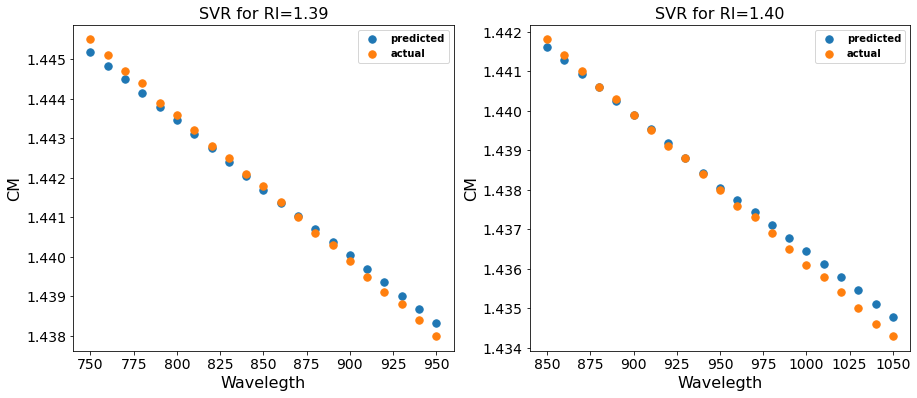

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
legend_pro={'weight':'bold'}
ax = axes[0]
ax.scatter(ri39['wl'], cv_pred_sv[49:70],s=55)
ax.scatter(ri39['wl'], ri39['CM'],s=55)
ax.set_xlabel('Wavelegth',fontsize=16)
ax.set_ylabel('CM',fontsize=16)
ax.set_title('SVR for RI=1.39',fontsize=16)
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_pro)
ax.tick_params(axis='both',labelsize=14)

ax = axes[1]
ax.scatter(ri40['wl'], cv_pred_sv[70:111],s=55)
ax.scatter(ri40['wl'], ri40['CM'],s=55)
ax.set_xlabel('Wavelegth',fontsize=16)
ax.set_ylabel('CM',fontsize=16)
ax.set_title('SVR for RI=1.40',fontsize=16)
ax.legend(loc='upper right',labels=['predicted','actual'],prop = legend_pro)
ax.tick_params(axis='both',labelsize=14)

plt.savefig('CM_SVR_WL_2-dpi.jpg',dpi=1200, bbox_inches = 'tight')

C:\Users\yarim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yarim\anacond

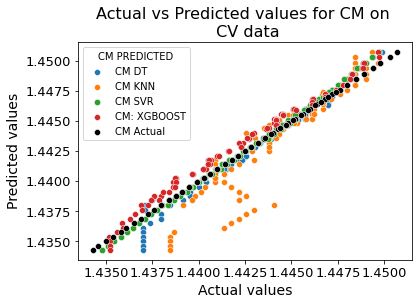

In [88]:
sns.scatterplot(dCV,cv['CM'])
sns.scatterplot(kCV,cv['CM'])
sns.scatterplot(sCV,cv['CM'],s=40)
sns.scatterplot(xCV,cv['CM'])
sns.scatterplot(cv['CM'],cv['CM'],color='black')
plt.legend(title='CM PREDICTED', loc='upper left', labels=['CM DT','CM KNN','CM SVR','CM: XGBOOST','CM Actual'])
plt.xlabel('CM')
plt.title('CM test data')
plt.xlabel('Actual values',fontsize=14)
plt.ylabel('Predicted values',fontsize=14)
plt.title('Actual vs Predicted values for CM on \n CV data',fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('All algo for cv CM.jpg',dpi=600, bbox_inches = 'tight')

C:\Users\yarim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yarim\anacond

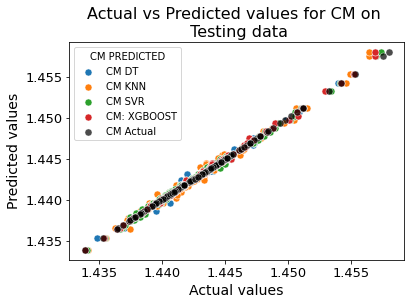

In [91]:
sns.scatterplot(dtr,c,s=50,alpha=1)
sns.scatterplot(knt,c,s=50,alpha=1)
sns.scatterplot(svrt,c,s=50,alpha=1)
sns.scatterplot(xgt,c,s=50,alpha=1)
sns.scatterplot(c,c,color='black',s=50,alpha=0.7)
plt.legend(title='CM PREDICTED', loc='upper left', labels=['CM DT','CM KNN','CM SVR','CM: XGBOOST','CM Actual'])
plt.xlabel('CM')
plt.title('CM test data')
plt.xlabel('Actual values',fontsize=14)
plt.ylabel('Predicted values',fontsize=14)
plt.title('Actual vs Predicted values for CM on \n Testing data',fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('All algo for testing CM.jpg',dpi=600, bbox_inches = 'tight')

C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

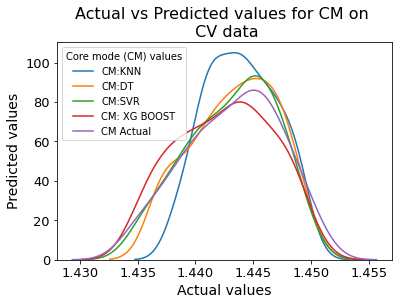

In [89]:
import seaborn as sns
sns.distplot(kCV,hist=False)
sns.distplot(dCV,hist=False)
sns.distplot(sCV,hist=False)
sns.distplot(xCV,hist=False)
sns.distplot(cv['CM'],hist=False)
plt.legend(title='Core mode (CM) values', loc='upper left', labels=['CM:KNN','CM:DT','CM:SVR','CM: XG BOOST' ,'CM Actual'])
plt.xlabel('CM')
plt.title('CM test data')
plt.xlabel('Actual values',fontsize=14)
plt.ylabel('Predicted values',fontsize=14)
plt.title('Actual vs Predicted values for CM on \n CV data',fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('All algo for cv CM-2.jpg',dpi=600, bbox_inches = 'tight')


C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

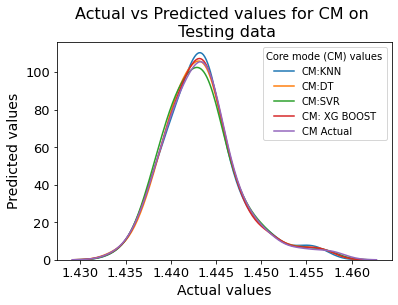

In [90]:
import seaborn as sns
sns.distplot(knt,hist=False)
sns.distplot(dtr,hist=False)
sns.distplot(svrt,hist=False)
sns.distplot(xgt,hist=False)
sns.distplot(c,hist=False)
plt.legend(title='Core mode (CM) values', loc='upper right', labels=['CM:KNN','CM:DT','CM:SVR','CM: XG BOOST' ,'CM Actual'])
plt.xlabel('CM')
plt.xlabel('Actual values',fontsize=14)
plt.ylabel('Predicted values',fontsize=14)
plt.title('Actual vs Predicted values for CM on \n Testing data',fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('All algo for test CM-2.jpg',dpi=600, bbox_inches = 'tight')
